In [15]:
import numpy as np
import pandas as pd
from keras.losses import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

# Load and Prepare Data
df = pd.read_csv("main_data.csv")
df.fillna(0, inplace=True)

In [16]:
X = df[['vnindex_close', 'sp500_close', 'gdp_growth', 'exchange_rate','interest_rate','inflation']]
Y = df['vcb_close']

# Normalize feature data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [26]:
# Define the sequence length
seq_length = 5 

X_seq, Y_seq = [], []

# Generate sequences
for i in range(len(X) - seq_length):
    X_seq.append(X[i:i+seq_length])
    Y_seq.append(Y[i+seq_length])

X_seq = np.array(X_seq)
Y_seq = np.array(Y_seq)

In [18]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_seq, Y_seq, test_size=0.4, random_state=42)

In [19]:
# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, X.shape[1])),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=1000, batch_size=64)

Epoch 1/1000
9/9 [==============================] - 1s 3ms/step - loss: 5939.8975
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 5912.3350
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 5881.7109
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 5836.2275
Epoch 5/1000
9/9 [==============================] - 0s 8ms/step - loss: 5748.7373
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 5527.5269
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 4795.5376
Epoch 8/1000
9/9 [==============================] - 0s 7ms/step - loss: 2716.8530
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 535.4381
Epoch 10/1000
9/9 [==============================] - 0s 7ms/step - loss: 442.7545
Epoch 11/1000
9/9 [==============================] - 0s 2ms/step - loss: 288.1625
Epoch 12/1000
9/9 [==============================] - 0s 2ms/step - loss: 235.1546
Epoch 13/1000
9/9

In [20]:
# Evaluate the model on the test set
Y_pred = model.predict(X_test)
Y_test_1d = Y_test.reshape(-1)  # Reshape to a 1D array
Y_pred_1d = Y_pred.reshape(-1)  # Reshape to a 1D array
mse = mean_squared_error(Y_test_1d, Y_pred_1d)
print(f"Mean Squared Error: {mse}")

11/11 [==============================] - 0s 1ms/step
Mean Squared Error: 11.627923965454102


In [21]:
train_results = pd.DataFrame(data={'Train Predictions':Y_pred_1d, 'Actuals':Y_test_1d})
train_results

,Train Predictions,Actuals
0,75.047150,76.955
1,58.383076,54.676
2,77.179550,80.000
3,65.645889,54.830
4,101.080902,101.000
...,...,...
343,64.629440,67.578
344,63.425316,64.276
345,79.339806,78.200
346,59.798874,63.354


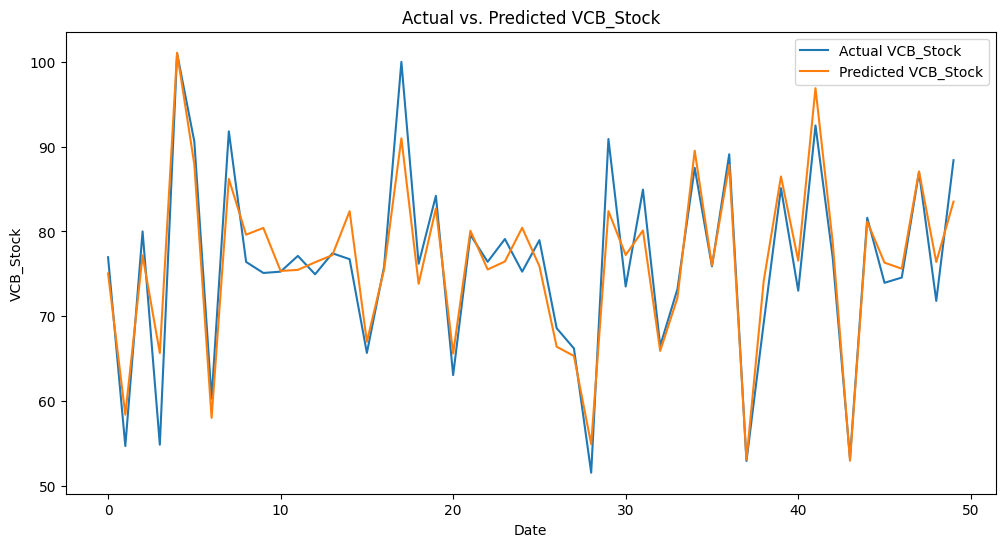

In [24]:
# Plot the predicted and actual VCB stock
plt.figure(figsize=(12, 6))
plt.plot(Y_test_1d[0:50], label="Actual VCB_Stock")
plt.plot(Y_pred_1d[0:50], label="Predicted VCB_Stock")
plt.legend()
plt.xlabel("Date")
plt.ylabel("VCB_Stock")
plt.title("Actual vs. Predicted VCB_Stock")
plt.show()